<a href="https://colab.research.google.com/github/jimmy-io/Insight_project/blob/master/feature_extractor_colabwithlocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

ImportError: ignored

In [10]:
%pwd


'/home/jimmy_joy_chem_gmail_com'

In [0]:
import os

In [5]:
!pip install keras 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 377 kB 4.8 MB/s 
     |████████████████████████████████| 50 kB 10.6 MB/s 
     |████████████████████████████████| 41 kB 1.0 MB/s 


In [7]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 421.8 MB 17 kB/s 
     |████████████████████████████████| 19.9 MB 52.9 MB/s 
     |████████████████████████████████| 448 kB 73.5 MB/s 
     |████████████████████████████████| 26.0 MB 28.9 MB/s 
     |████████████████████████████████| 69 kB 10.3 MB/s 
     |████████████████████████████████| 104 kB 39.6 MB/s 
     |████████████████████████████████| 57 kB 6.5 MB/s 
     |████████████████████████████████| 3.8 MB 50.6 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=5680 sha256=73c465ada7f6fed080a443f5f73af86871206c84095369e754ef16a04a37e0eb
  Stored in directory: /home/jimmy_joy_chem_gmail_com/.cache/pip/wheels/91/0e/11/1f1321dce76e9c542907008e4a94ff79f8bf525a3fa32b09f3
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7636 sha256=8440324170dc694c5732e93a8509df5ddde28f71cabcb64a8c3d4d3c856bc2ba
  Stored in directory: /hom

In [12]:
##Using a pre-trained model VGG16 in Keras to extract the feature of a given image

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'hannah2019july5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
## Using kMeans in Scikit-Learn to cluster a set of images

from sklearn.cluster import KMeans

vgg16_feature_list = []

directory = '/content/drive/My Drive/Insight/Project/fashionbeans/test/items'
counter=0
onlyfiles = next(os.walk(directory))[2]

for filename in os.listdir(directory):
  print(filename)

  img = image.load_img(filename, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg16_feature = model.predict(img_data)
  vgg16_feature_np = np.array(vgg16_feature)
  vgg16_feature_list.append(vgg16_feature_np.flatten())

vgg16_feature_list_np = np.array(vgg16_feature_list)
kmeans = KMeans(n_clusters=2, random_state=0).fit(vgg16_feature_list_np)

masked_item-101.jpg
masked_item-201.jpg
masked_item-301.jpg
masked_item-403.jpg
masked_item-503.jpg
masked_item-102.jpg
masked_item-202.jpg
masked_item-302.jpg
masked_item-402.jpg
masked_item-103.jpg
masked_item-203.jpg
masked_item-303.jpg
masked_item-104.jpg
masked_item-204.jpg
masked_item-304.jpg
masked_item-404.jpg
masked_item-504.jpg


In [25]:
%cd Untitled\ Folder

/home/jimmy_joy_chem_gmail_com/Untitled Folder


In [26]:
##Using a pre-trained model InceptionV3 in Keras to extract the feature of a given image

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet', include_top=False)
model.summary()

img_path = 'hannah2019july5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

INV3_feature = model.predict(img_data)

print(INV3_feature.shape)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, None, None, 3 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, None, None, 3 0           batch_normalization_471[0][0]    
_______________________________________________________________________________________

In [0]:

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans

/home/jimmy_joy_chem_gmail_com


In [41]:
## Using kMeans in Scikit-Learn to cluster a set of images


INV3_feature_list = []
INV3_feature_dic={}

%cd
directory = 'items'
counter=0


onlyfiles = len(next(os.walk(directory))[2])

for filename in os.listdir(directory):
  

  model = InceptionV3(weights='imagenet', include_top=False)
  #model.summary()
  
  img = image.load_img('items/'+str(filename), target_size=(224, 224))

  print(filename)

  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  INV3_feature = model.predict(img_data)

  

  INV3_feature_np = np.array(INV3_feature)
  INV3_feature_list.append(INV3_feature_np.flatten())

  counter+=1

  print(str(counter)+'of'+str(onlyfiles))

INV3_feature_list_np = np.array(INV3_feature_list)


/home/jimmy_joy_chem_gmail_com
masked_item-101.jpg
1of17
masked_item-504.jpg
2of17
masked_item-102.jpg
3of17
masked_item-103.jpg
4of17
masked_item-302.jpg
5of17
masked_item-104.jpg
6of17
masked_item-201.jpg
7of17
masked_item-402.jpg
8of17
masked_item-204.jpg
9of17
masked_item-503.jpg
10of17
masked_item-304.jpg
11of17
masked_item-403.jpg
12of17
masked_item-303.jpg
13of17
masked_item-202.jpg
14of17
masked_item-404.jpg
15of17
masked_item-301.jpg
16of17
masked_item-203.jpg
17of17


In [44]:
import pandas as pd

pd.DataFrame(INV3_feature_list_np)


,0,1,2,3,4,5,6,7,8,9,...,51190,51191,51192,51193,51194,51195,51196,51197,51198,51199
0,0.226810,0.000000,1.736768,0.620554,0.000000,0.000000,0.0,0.000000,0.824759,0.000000,...,0.333138,0.434128,0.000000,0.000000,0.000000,0.000000,0.000000,2.121709,1.196595,1.640074
1,0.000000,0.000000,1.010518,0.284020,0.000000,0.000000,0.0,0.065627,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.669721,0.061074,0.000000,0.707167,0.153021,0.000000,0.000000
2,0.069183,0.000000,2.027562,0.471024,0.000000,0.000000,0.0,0.000000,0.509356,0.000000,...,0.000000,0.632101,0.000000,0.000000,0.000000,0.000000,0.503833,1.032371,0.038555,0.000000
3,0.000000,0.000000,1.942731,0.732643,0.000000,0.000000,0.0,0.000000,0.126656,0.000000,...,2.856390,2.069963,0.000000,2.296900,0.977588,0.000000,0.000000,2.172759,0.000000,0.000000
4,0.000000,0.000000,1.026214,0.000000,0.000000,0.168101,0.0,0.000000,0.000000,0.000000,...,0.280999,0.469900,0.047858,1.606981,1.199443,0.525244,0.000000,0.195336,0.348880,0.000000
5,0.034189,0.243268,2.310161,0.573020,0.000000,0.000000,0.0,0.000000,0.325385,0.000000,...,1.563851,2.690886,0.000000,1.540721,0.902308,0.459736,2.363736,1.619146,0.000000,0.000000
6,0.000000,0.000000,1.321133,0.000000,0.000000,1.115507,0.0,0.000000,0.000000,0.022356,...,0.000000,0.007610,0.000000,2.321106,0.681616,1.405322,1.519466,0.040752,0.000000,0.000000
7,0.532082,0.000000,1.166960,0.151626,0.209573,0.000000,0.0,0.000000,0.244606,0.000000,...,0.000000,1.705057,0.568941,1.072793,1.430990,0.011048,0.807471,1.337767,1.701517,0.000000
8,0.000000,0.000000,0.435898,0.000000,0.000000,2.002937,0.0,0.000000,0.000000,0.000000,...,0.000000,1.548737,0.000000,1.946858,0.036889,0.428213,0.000000,1.296242,0.000000,0.000000
9,0.000000,0.000000,0.866927,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.242333,0.739898,0.000000,2.257922,0.336948,0.604693,0.000000,0.554341,0.000000,0.000000


In [54]:
### Silhouette Coefficient

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing

INV3_feature_list_np_norm = preprocessing.normalize(INV3_feature_list_np)

kmeans_model = KMeans(n_clusters=2, random_state=0).fit(INV3_feature_list_np_norm)
labels = kmeans_model.labels_
metrics.silhouette_score(INV3_feature_list_np, labels, metric='euclidean')

0.208722

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

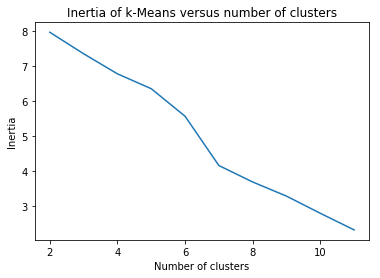

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = [KMeans(n_clusters=i+2).fit(INV3_feature_list_np_norm).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [61]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(INV3_feature_list_np_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf


,principal component 1,principal component 2
0,0.057953,0.547640
1,0.422132,-0.256258
2,0.115753,0.496476
3,-0.049358,0.507799
4,0.483527,-0.188218
5,0.012759,0.482934
6,0.516223,-0.220391
7,-0.396968,-0.177843
8,0.499147,-0.148877
9,0.364966,-0.116326


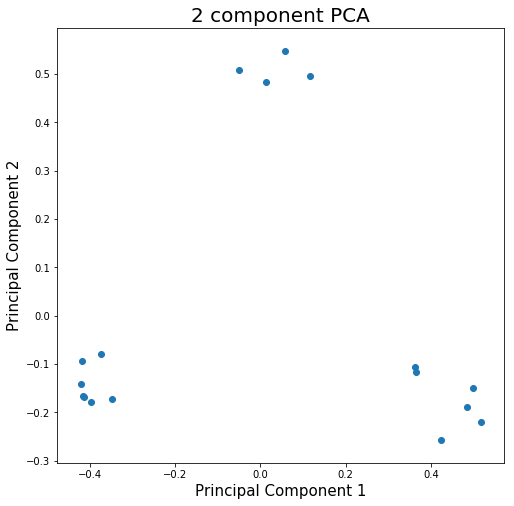

In [64]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               )
